# EMTECH Emerging Technologies Institute

## Marlon Rivera Muñoz

# Bienvenido al análisis de la empresa Synergy Logistics

In [14]:
# Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
synergy_df=pd.read_csv(filepath_or_buffer="synergy_logistics_database.csv")

In [16]:
synergy_df.describe()

,register_id,year,total_value
count,19056.000000,19056.000000,1.905600e+04
mean,9528.500000,2017.496327,1.131881e+07
std,5501.137701,1.706975,1.536656e+07
min,1.000000,2015.000000,0.000000e+00
25%,4764.750000,2016.000000,6.400000e+04
50%,9528.500000,2017.000000,5.000000e+06
75%,14292.250000,2019.000000,1.600000e+07
max,19056.000000,2020.000000,2.850000e+08


## Observamos que tenemos información acerca de las exportaciones e importaciones de la empresa

## Se dispone de la información de los tipos de transporte y valor generado por cada operación

## El objetivo de este ánalisis es identificar la mejor estrategia operativa para la empresa

In [19]:
synergy_df.head(5)

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [20]:
synergy_df.tail(5)

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
19051,19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000
19055,19056,Imports,Malaysia,Singapore,2020,01/07/20,Gas turbines,Sea,Union Energy Co,30000000


# ¿Será una buena estrategia enfocarse en las rutas de operación?

# Análisis de rutas de importación y exportación

### Primero obtenemos los países de origen

In [21]:
Origins=list(synergy_df["origin"].unique())
print(Origins)
print(len(Origins))

['Japan', 'Germany', 'China', 'Italy', 'USA', 'Russia', 'South Korea', 'Netherlands', 'France', 'Canada', 'Belgium', 'Spain', 'India', 'United Kingdom', 'Australia', 'Brazil', 'Switzerland', 'Mexico', 'Austria', 'Singapore', 'Vietnam', 'Malaysia', 'United Arab Emirates']
23


### Obtenemos los países de destino

In [22]:
destinations=list(synergy_df["destination"].unique())
print(destinations)
print(len(destinations))

['China', 'USA', 'South Korea', 'Spain', 'Italy', 'Japan', 'Germany', 'Mexico', 'Brazil', 'France', 'Switzerland', 'United Kingdom', 'Croatia', 'Ireland', 'Belgium', 'Argentina', 'Singapore', 'Canada', 'Netherlands', 'Belorussia', 'Turkey', 'India', 'Vietnam', 'Russia', 'United Arab Emirates', 'Thailand', 'Philippines', 'Peru', 'Austria', 'New Zealand', 'Rusia', 'Slovakia', 'Malaysia', 'Poland']
34


### Encontramos que se tienen 23 países de origen y 34 de destino

### Para lograr identificar las mejores rutas de acuerdo a las rutas de origen y destino que realiza la empresa es necesario obtener esta información y así determinar las mejores rutas

In [719]:
num=len(Origins)
Rutas= np.empty((num,0)).tolist()
num_Rutas=0
for j in range(0,len(Origins)):
    for k in range(0,len(destinations)):
            ruta=(synergy_df.origin==Origins[j]) & (synergy_df.destination == destinations[k])
            num_Rutas+=1
            if ((ruta.value_counts())[0]) != len(ruta):
                #print((ruta.value_counts())[1])
                Rutas[j].append((ruta.value_counts())[1])
             
            else:
                Rutas[j].append(0)
                
                
           
                  
            
print("Rutas únicas de la empresa:")           
print((num_Rutas))           



Rutas únicas de la empresa:
782


### Encontramos que la empresa cuenta con 782 rutas únicas de acuerdo a las combinaciones de Origen, Destino. 

### Dentro de las cuales necesitamos identificar cuales son las rutas más demandadas

#### Realizamos un diccionario el cual considere únicamente el origen de las rutas

In [720]:
Rutas_zip=zip(Origins,Rutas)
Rutas_dict=dict(Rutas_zip)


In [721]:
test=zip(destinations,Rutas[0])
test_dict=dict(test)
print(test_dict)
len(test_dict)

{'China': 196, 'USA': 140, 'South Korea': 62, 'Spain': 15, 'Italy': 0, 'Japan': 0, 'Germany': 54, 'Mexico': 385, 'Brazil': 306, 'France': 0, 'Switzerland': 21, 'United Kingdom': 0, 'Croatia': 0, 'Ireland': 0, 'Belgium': 0, 'Argentina': 0, 'Singapore': 43, 'Canada': 273, 'Netherlands': 0, 'Belorussia': 0, 'Turkey': 0, 'India': 8, 'Vietnam': 0, 'Russia': 68, 'United Arab Emirates': 76, 'Thailand': 55, 'Philippines': 0, 'Peru': 0, 'Austria': 0, 'New Zealand': 0, 'Rusia': 0, 'Slovakia': 0, 'Malaysia': 0, 'Poland': 0}


34

#### Realizamos un diccionario para enlazar los origenes con todos los destinos posibles para así tener la información accesible desde un mismo diccionario

### Ahora es posible lograr identificar una ruta por su clave de Origen y así obtener todos los destinos y número de operaciones {Origen: [(Destino1,#),(Destino2,#)...]

In [726]:
def dictionaryMaker (Origins,destinations,Rutas):
    destinos=[]
    for i in range(len(Origins)):
        test=zip(destinations,Rutas[i])
        test_dict=dict(test)
        test_sort=sorted(test_dict.items(),key=lambda x:x[1], reverse=True)
        destinos.append(test_sort)
    
    Rutas_zip=zip(Origins,destinos)
    Rutas_dict=dict(Rutas_zip)
    return Rutas_dict

#Rutas_zip=zip(Origins,destinos)
#Rutas_dict=dict(Rutas_zip)
Rutas_dict=dictionaryMaker(Origins,destinations,Rutas)
print(Rutas_dict)

{'Japan': [('Mexico', 385), ('Brazil', 306), ('Canada', 273), ('China', 196), ('USA', 140), ('United Arab Emirates', 76), ('Russia', 68), ('South Korea', 62), ('Thailand', 55), ('Germany', 54), ('Singapore', 43), ('Switzerland', 21), ('Spain', 15), ('India', 8), ('Italy', 0), ('Japan', 0), ('France', 0), ('United Kingdom', 0), ('Croatia', 0), ('Ireland', 0), ('Belgium', 0), ('Argentina', 0), ('Netherlands', 0), ('Belorussia', 0), ('Turkey', 0), ('Vietnam', 0), ('Philippines', 0), ('Peru', 0), ('Austria', 0), ('New Zealand', 0), ('Rusia', 0), ('Slovakia', 0), ('Malaysia', 0), ('Poland', 0)], 'Germany': [('China', 328), ('France', 299), ('USA', 236), ('Mexico', 231), ('South Korea', 144), ('Italy', 130), ('Canada', 93), ('Brazil', 85), ('United Kingdom', 52), ('Poland', 36), ('India', 30), ('Spain', 0), ('Japan', 0), ('Germany', 0), ('Switzerland', 0), ('Croatia', 0), ('Ireland', 0), ('Belgium', 0), ('Argentina', 0), ('Singapore', 0), ('Netherlands', 0), ('Belorussia', 0), ('Turkey', 0),

### Creamos una función especial para ordenar el diccionario creado, el cual ordena las listas de destinos de cada clave de origen, y al ordenar estos extraemos el destino más alto para lograr delimitar nuestras rutas más fácilmente

### Al obtener estos valores utilizamos una funcion lambda para ordenar este listado extraído y así obtener las rutas más demandadas

In [729]:
def dictionaryMakerSorted (Origins,Rutas_dict):
    mayor_demanda=[]
    for i in range(0,len(Origins)):
        mayor_demanda.append(Rutas_dict[Origins[i]][0])

    mz=zip(Origins,mayor_demanda)
    mayor_demanda_dict=dict(mz)
    mayor_demanda_sort=sorted(mayor_demanda_dict.items(),key=lambda x:x[1][1], reverse=True)
    return mayor_demanda_sort
mayor_demanda_sort=dictionaryMakerSorted(Origins,Rutas_dict)
print(mayor_demanda_sort)

[('South Korea', ('Vietnam', 497)), ('Netherlands', ('Belgium', 437)), ('USA', ('Netherlands', 436)), ('Japan', ('Mexico', 385)), ('China', ('Mexico', 351)), ('Germany', ('China', 328)), ('Australia', ('Singapore', 273)), ('Singapore', ('Thailand', 273)), ('Canada', ('Mexico', 261)), ('Mexico', ('New Zealand', 249)), ('United Kingdom', ('Belgium', 229)), ('France', ('Belgium', 223)), ('Russia', ('Belorussia', 219)), ('India', ('United Arab Emirates', 214)), ('Brazil', ('China', 195)), ('Malaysia', ('Thailand', 195)), ('Spain', ('Germany', 194)), ('Belgium', ('United Kingdom', 146)), ('Italy', ('Germany', 109)), ('Austria', ('Switzerland', 99)), ('Switzerland', ('Russia', 73)), ('United Arab Emirates', ('India', 20)), ('Vietnam', ('United Arab Emirates', 18))]


## 10 Rutas más demandadas

In [716]:
for i in range(0,10):
    print(mayor_demanda_sort[i][0],mayor_demanda_sort[i][1])

South Korea ('Vietnam', 497)
Netherlands ('Belgium', 437)
USA ('Netherlands', 436)
Japan ('Mexico', 385)
China ('Mexico', 351)
Germany ('China', 328)
Australia ('Singapore', 273)
Singapore ('Thailand', 273)
Canada ('Mexico', 261)
Mexico ('New Zealand', 249)


## ¿Estas 10 rutas serán las que generen más valor a la empresa?

#### Para determinar esto filtramos el dataframe de pandas para solo obtener los valores de origen y destino de acuerdo a las combinaciones de rutas existentes. Utilizando los métodos de Pandas para delimitar el dataframe y almacenar el valor total generado por cada ruta

In [411]:
revenue=np.zeros((23,34))
#print(synergy_df.total_value[2])

for j in range(0,len(Origins)):
    for k in range(0,len(destinations)):
            ruta_copy=(synergy_df.origin==Origins[j]) & (synergy_df.destination == destinations[k])
            if ((ruta_copy.value_counts())[0]) != len(ruta):
                
                for i in range(0,len(ruta_copy)):
                    if ruta_copy[i]:
                        revenue[j][k]+=synergy_df.total_value[i]
             
            else:
                revenue[j][k]=0

#print(revenue)

#print(revenue[0][0])
   

In [335]:
revenue_dict=dictionaryMaker(Origins,destinations,revenue)
revenue_dict_sorted=dictionaryMakerSorted(Origins,revenue_dict)
#print(revenue_dict_sorted)

### Seguimos un procedimiento similar al utilizar la misma función y así obtener en el mismo formato de Rutas pero con el valor generado y así comparar con la demanda

## 10 rutas con mayor valor

In [408]:
for i in range(0,10):
    print(revenue_dict_sorted[i][0],revenue_dict_sorted[i][1])

China ('Mexico', 12494000000.0)
Canada ('Mexico', 8450000000.0)
South Korea ('Vietnam', 6877007000.0)
Japan ('Mexico', 5829000000.0)
France ('Belgium', 5538069000.0)
USA ('Mexico', 4710000000.0)
Germany ('Italy', 4541000000.0)
Singapore ('Thailand', 4017000000.0)
Russia ('Belorussia', 3529000000.0)
Malaysia ('Thailand', 3482000000.0)


### Para determinar si es una buena estrategia enfocarse en las rutas con mayor demanda, obtenemos las rutas con mayor demanda presentes en el listado de las rutas con mayor valor

([<matplotlib.patches.Wedge at 0x207ced83040>,
 [Text(0.15654637770487648, 1.0888035780743386, 'Rutas con mayor valor dentro de top 10 más demandadas con valor total de: \n $62470000000.0'),
  Text(-0.1565465815871697, -1.0888035487604601, 'Rutas con mayor valor fuera del top 10 más demandadas con valor total de: \n $74964000000.0')],
 [Text(0.08538893329356899, 0.593892860767821, '45%'),
  Text(-0.08538904450209256, -0.5938928447784327, '55%')])

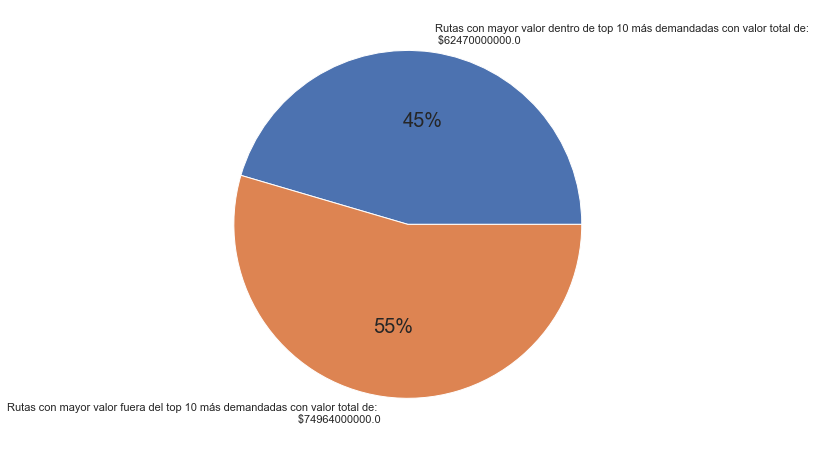

In [730]:
top_rutas_si=0
top_rutas_no=0

for i in range(0,10):
    for j in range (0,10):
        if mayor_demanda_sort[i][0] == revenue_dict_sorted[j][0] and mayor_demanda_sort[i][1][0] == revenue_dict_sorted[j][1][0]:
            top_rutas_si=top_rutas_si+revenue_dict_sorted[0][1][1]
        else:
            top_rutas_no=top_rutas_si+revenue_dict_sorted[0][1][1]
valores=[top_rutas_si,top_rutas_no]
labels=['Rutas con mayor valor dentro de top 10 más demandadas con valor total de: \n $'+ str(top_rutas_si), 'Rutas con mayor valor fuera del top 10 más demandadas con valor total de: \n $'+ str(top_rutas_no)]
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 20
plt.pie(valores,labels=labels,autopct='%0.0f%%')

            

### Al enfocar en las más demandadas se observa como sólo representan el 45% de las rutas que generan mayor valor de las exportaciones e importaciones

### Por lo tanto, considero que no sería una buena estrategia para implementar ya que la mayoría de las ganancias provienen de otras rutas no necesariamente dentro del top 10 más demandadas. Al enfocar esfuerzos en las más demandadas se vera reflejado con menores ganancias al no ser las que generan mayor valor para la empresa

# ¿Será una buena estrategia enfocarse en los medios de transporte utilizados?

### Para determinar esto sencillamente obtenemos los tipos de transporte de la empresa de acuerdo a los valores unicos de Transport_type

In [463]:
def SimpleDict(transport_type,transport_count):
    zt=zip(transport_type,transport_count)
    transport_types_dict=dict(zt)
    return transport_types_dict

## Al obtenerlos realizamos un conteo de cada tipo de transporte utilizando bucles y filtrado por tipo de transporte

{'Sea': 10688, 'Air': 2389, 'Rail': 3381, 'Road': 2598}


Text(0.5, 1.0, 'Medios de transporte: \nUtilizados en importaciones y exportaciones')

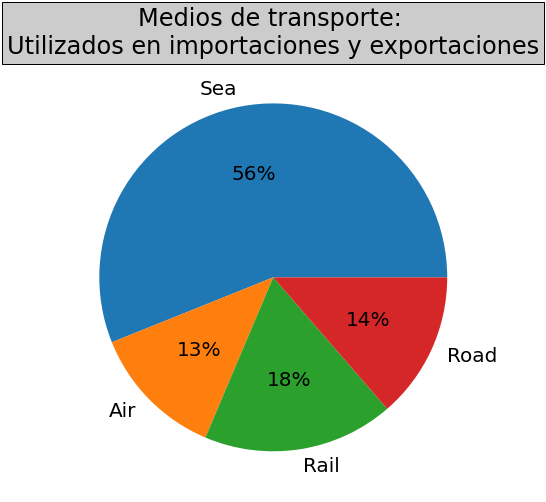

In [471]:
transport_type=list(synergy_df["transport_mode"].unique())
transport_count=[0]*4
for i in range(0,len(transport_type)):
    transport_counter=(synergy_df.transport_mode== transport_type[i])
    transport_count[i]=(transport_counter.value_counts()[1])

transport_types_dict=SimpleDict(transport_type,transport_count)
print(transport_types_dict)
valores=transport_count
labels=transport_type
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 20
plt.pie(valores,labels=labels,autopct='%0.0f%%')
plt.title("Medios de transporte: \n" + "Utilizados en importaciones y exportaciones", bbox={'facecolor':'0.8', 'pad':5})


### Se observa como el medio de transporte principal es marítimo. Pero es necesario considerar cual aporta mayor valor en cuanto a las importaciones y exportaciones

In [520]:
synergy_df.transport_mode
revenue_transports=np.zeros(len(transport_type))
revenue_transports_mean=np.zeros(len(transport_type))
for i in range(0,len(transport_type)):
    filtro_transport=synergy_df.transport_mode==transport_type[i]
    revenue_transports[i]=synergy_df[filtro_transport].total_value.sum()
    revenue_transports_mean[i]=synergy_df[filtro_transport].total_value.mean()


revenue_transports_dict=SimpleDict(transport_type,revenue_transports)
revenue_transports_mean_dict=SimpleDict(transport_type,revenue_transports_mean)
revenue_transports_dict_sort=sorted(revenue_transports_dict.items(),key=lambda x:x[1], reverse=True)
revenue_transports_mean_sort=sorted(revenue_transports_mean_dict.items(),key=lambda x:x[1], reverse=True)
#print(revenue_transports_dict_sort)
#print(revenue_transports_mean_sort)



## Valor por rutas de transporte

In [521]:

for i in range(0,len(revenue_transports_dict_sort)):
    print("["+str(i+1)+"] "+"Medio de transporte: "+str(revenue_transports_dict_sort[i][0])+": $",revenue_transports_dict_sort[i][1])
    


[1] Medio de transporte: Sea: $ 100530622000.0
[2] Medio de transporte: Rail: $ 43628043000.0
[3] Medio de transporte: Air: $ 38262147000.0
[4] Medio de transporte: Road: $ 33270486000.0


#### Podemos observar como el medio marítimo es el que genera mayor valor para la empresa. Sin embargo, en base a los resultados anteriores el medio maritimo representa el 56% de los medios de transporte por lo tanto es lógico que represente mayor valor pero lo que considero que sea información útil para evaluar y contrastar los medios de transporte utilizados.

#### Por lo tanto, en necesario calcular el valor promedio de las rutas de transporte para así evaluar justamente el valor que estos medios de transporte representan para la empresa

## Valor promedio por rutas de transporte

In [522]:

for i in range(0,len(revenue_transports_dict_sort)):
    print("["+str(i+1)+"] "+"Medio de transporte: "+str(revenue_transports_mean_sort[i][0])+": $",revenue_transports_mean_sort[i][1])

[1] Medio de transporte: Air: $ 16015967.76894098
[2] Medio de transporte: Rail: $ 12903887.311446318
[3] Medio de transporte: Road: $ 12806191.68591224
[4] Medio de transporte: Sea: $ 9405933.944610778


## Gráficas de Valor por rutas de transporte

Text(0.5, 1.0, 'Medios de transporte: \nValor de importaciones y exportaciones')

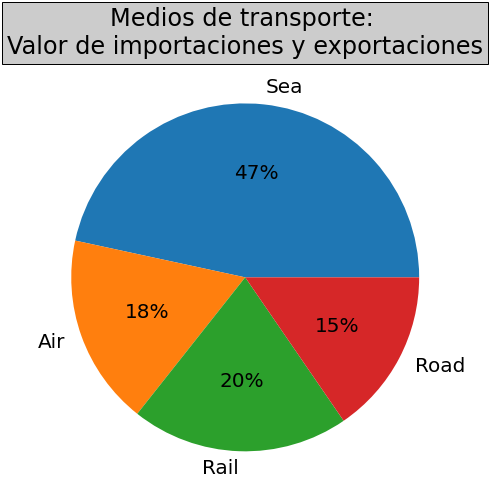

In [523]:
valores=revenue_transports
labels=transport_type
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 20
plt.pie(valores,labels=labels,autopct='%0.0f%%')
plt.title("Medios de transporte: \n" + "Valor de importaciones y exportaciones", bbox={'facecolor':'0.8', 'pad':5})


## Gráficas de Valor promedio por rutas de transporte

Text(0.5, 1.0, 'Medios de transporte: \nPromedio de valor de importaciones y exportaciones')

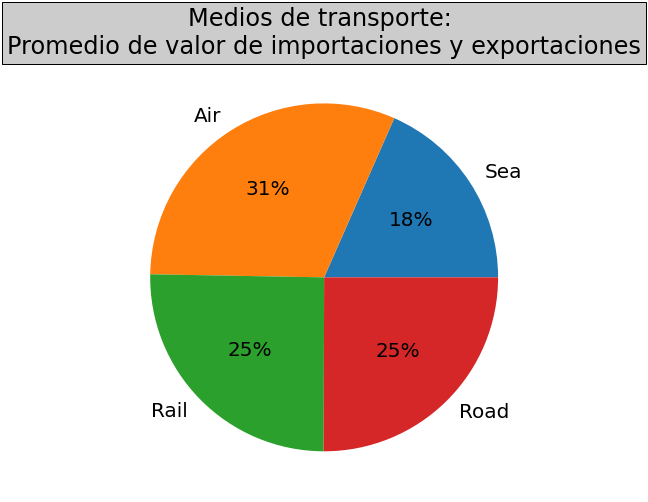

In [513]:
transport_type_mean=transport_type
valores_m=revenue_transports_mean
labels=transport_type_mean
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 20
plt.pie(valores_m,labels=labels,autopct='%0.0f%%')
plt.title("Medios de transporte: \n" + "Promedio de valor de importaciones y exportaciones", bbox={'facecolor':'0.8', 'pad':5})

### Como se mencionó anteriormente, podemos apreciar cómo los resultados indican que aunque el medio de transporte maritimo es el que más flujo total de valor representa debido a que es el medio de transporte más utilizado, este es el medio que tiene un valor promedio más bajo en comparación a los otros medios de transporte.

### Por lo tanto, para esta opción 2 considero que lo mas viable sería reducir el medio de transporte marítimo el cual puede ser fácilmente reemplazable el porcentaje por el medio de transporte áereo al representar el medio de transporte con mayor valor para la empresa.

# ¿Será una buena estrategia enfocarse en el valor total de importaciones y exportaciones?

## Para determinar esto nos enfocamos en encontrar los países que sea vean involucrados en origen como destino y así obtener un valor por país de acuerdo a importaciones y exportaciones en general

In [732]:
xp=Origins+destinations
paises_s=set(xp)
paises=list(paises_s)
revenue_paises=np.zeros(len(paises))
revenue_paises_mean=np.zeros(len(paises))
total=0
for i in range(0,len(paises)):
    filtro_pais=synergy_df.origin==paises[i] 
    filtro_pais_2=synergy_df.destination==paises[i]
    revenue_paises[i]=(synergy_df[filtro_pais].total_value.sum())+(synergy_df[filtro_pais_2].total_value.sum())
    total=total+revenue_paises[i]
    revenue_paises_mean[i]=((synergy_df[filtro_pais].total_value.mean())+(synergy_df[filtro_pais_2].total_value.mean()))/2
#print(revenue_paises)
#print(revenue_paises_mean)


revenue_paises_dict=SimpleDict(paises,revenue_paises)
revenue_paises_mean_dict=SimpleDict(paises,revenue_paises_mean)
revenue_paises_sort=sorted(revenue_paises_dict.items(),key=lambda x:x[1], reverse=True)
revenue_paises_mean_sort=sorted(revenue_paises_mean_dict.items(),key=lambda x:x[1], reverse=True)




    
    

In [686]:
print(revenue_paises_sort)

[('China', 59042038000.0), ('Mexico', 43249770000.0), ('USA', 40563715000.0), ('Japan', 34648128000.0), ('Germany', 32005684000.0), ('South Korea', 25831814000.0), ('France', 25780881000.0), ('Russia', 15915219000.0), ('Belgium', 15687380000.0), ('Canada', 15019779000.0), ('Thailand', 14082000000.0), ('Italy', 12744013000.0), ('Spain', 12353191000.0), ('United Kingdom', 11176285000.0), ('Brazil', 10271016000.0), ('United Arab Emirates', 9256119000.0), ('Singapore', 7970811000.0), ('Netherlands', 7884608000.0), ('Vietnam', 7417007000.0), ('India', 6142000000.0), ('Argentina', 4860036000.0), ('Malaysia', 3560218000.0), ('Belorussia', 3529000000.0), ('Switzerland', 2994346000.0), ('Australia', 2570000000.0), ('Poland', 2188000000.0), ('Turkey', 1446000000.0), ('Ireland', 1147123000.0), ('Rusia', 989046000.0), ('Croatia', 699000000.0), ('Philippines', 344000000.0), ('New Zealand', 9382000.0), ('Austria', 3056000.0), ('Peru', 1673000.0), ('Slovakia', 258000.0)]


## Países que generan el 80% de valor de exportaciones e importaciones

In [700]:
Meta80=total*0.8
paises_80=list()
montos_80=list()
l=0
monto=0
while monto < Meta80:
    monto=monto+revenue_paises_sort[l][1]
    paises_80.append(revenue_paises_sort[l][0])
    montos_80.append(revenue_paises_sort[l][1])
    print("["+str(l+1)+"] "+str(paises_80[l])+":          $"+str(revenue_paises_sort[l][1]))
    l+=1
    

[1] China:          $59042038000.0
[2] Mexico:          $43249770000.0
[3] USA:          $40563715000.0
[4] Japan:          $34648128000.0
[5] Germany:          $32005684000.0
[6] South Korea:          $25831814000.0
[7] France:          $25780881000.0
[8] Russia:          $15915219000.0
[9] Belgium:          $15687380000.0
[10] Canada:          $15019779000.0
[11] Thailand:          $14082000000.0
[12] Italy:          $12744013000.0
[13] Spain:          $12353191000.0


### Por lo tanto es evidente cómo en su mayoría de los 35 países presentes en exportaciones e importaciones solo 13 de ellos representan el 80% del valor generado para la empresa, por lo tanto hay un gran área de oportunidad para la empresa para enfocarse en estas empresas.

Text(0.5, 1.0, 'Medios de transporte: \nValor de importaciones y exportaciones')

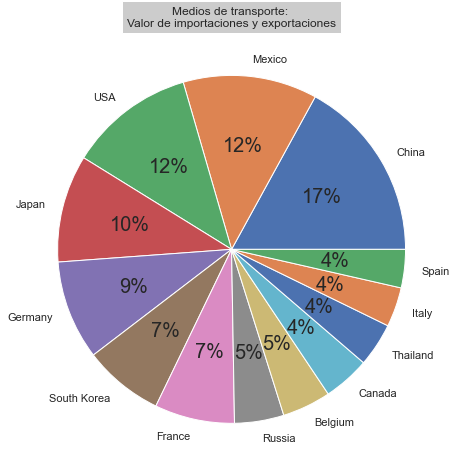

In [701]:
valores=montos_80
labels=paises_80
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 20
plt.pie(valores,labels=labels,autopct='%0.0f%%')
plt.title("Medios de transporte: \n" + "Valor de importaciones y exportaciones", bbox={'facecolor':'0.8', 'pad':5})


### Para ver dentro de estos países que generan el 80% encontramos como el 51% de ellos se distribuye solo en 4 países.

### Por lo tanto se encuentra que hay un gran mercado a enfocarse en estos países. Sería una buena estrategia sumar esfuerzos en China, México, USA y Japón. Al representar el 51% del valor generado al contar los valores de origen y destino de las importaciones y exportaciones


# Para concluir considero que en base a los resultados obtenidos. Se logró obtener información relevante que definitivamente apoyara al equipo de operaciones en la toma de decisiones. 

# #1 Enfocarse únicamente en la demanda no sería buena opción ya que si solo incluimos estas rutas se pierde un 55% de potencial de las rutas que generan mayor valor para la empresa

# #2 El reducir el medio de transporte marítimo es una buena opción ya que es el medio que menos valor aporta a la empresa aunque este sea el mayormente utilizado. Dónde se tiene un gran área de oportunidad para el áereo al ser el menos utilizado pero el que más valor ha aportado a la empresa

# #3 Sería una excelente estrategia enfocar esfuerzos en las empresas que general el 80% ya que encontramos que solo en 4 países se cuenta con el 51% del valor de la empresa. 

# #4 China, México, USA y Japón son países con sumamente relevantes para las operaciones de la empresa, por lo tanto se debería sumar esfuerzos para seguir impulsando estos mercados